# Loops & Orbits &mdash; Week 2 &mdash; Day 2 &mdash; Jupyter Notebook

## Home Run with Air Resistance

The new thing in the initialization code below is the drag captured as a new variable `air_constant_over_m`. **Execute the initialization cell.** All these variables will then be available to the rest of the code.

In [1]:
# Initial speed of hit ball in meters per second
initial_speed = 60

# Initial angle of hit ball in degrees from horizontal
initial_angle = 30

# Simulation time step in seconds
delta_t = 0.1

# Distance to fence in meters
distance_to_fence = 100

# density_of_air * area_of_ball * drag_coefficient / (2 * mass_of_ball)
# just call the whole combo air_constant_over_m
air_constant_over_m = 0.012

# Below is the way g is usually defined -- the amount is 9.81 m/s^2 downwards.
# People don't put a minus sign in g -- that's a convention and we are not changing it.
# When you use this constant, you have to remember to put the minus sign in front of it
# to take care of the fact that gravity pulls in the -y direction.
g = 9.81

# Simulation time step in seconds
delta_t = 0.1

# Even though you don't know how import statements work yet, trust
# that the following import allows you to use the sin function,
# the cos function, the atan2 function (arctangent), the sqrt function,
# and the constant pi anywhere you like in the rest of the code:
from math import sin, cos, atan2, sqrt, pi

# The following import statement makes the plotting library available to us. There is also a
# statement to work around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
%matplotlib inline
import matplotlib.pyplot as plt

## Function to get Components of a Vector

In the last notebook, we had two functions that calculated horizontal velocity and vertical velocity.

Let's combine those two functions into a single function and have both components returned as a tuple.

**Below, fix up the formula for vertical_component.**

In [2]:
# computes horizontal and vertical components of a vector and returns them as a tuple
def vector_components(length, angle_from_horizontal):
    # convert angle from degrees to radians
    angle = angle_from_horizontal * pi / 180.0
    # this line is good
    horizontal_component = length * cos(angle)
    # fix the next line -- DONE
    vertical_component = length * sin(angle)
    # return both components as a tuple
    return horizontal_component, vertical_component

# Don't change the next two lines. They are going to tell us whether your vector_components implementation
# is right. If it is, you'll get about 51.96 and 30.00 as the result of this cell.
initial_horizontal_velocity, initial_vertical_velocity = vector_components(initial_speed, initial_angle)
initial_horizontal_velocity, initial_vertical_velocity

(51.96152422706632, 29.999999999999996)

## Functions to get Angle and Speed from Components

We are going to use `atan2` which is a form of the arctangent function to get the angle. In fact, the function `angle_from_velocity` is already fully implemented.

**Implement** `speed_from_velocity` **using the Pythagorean theorem.**

In [3]:
# sometimes we need to go from components to angle and speed -- instead of from angle and speed to components

# get angle from components using atan2 version of arctangent function
def angle_from_velocity(horizontal_velocity, vertical_velocity):
    # use the arctangent function
    angle = atan2(vertical_velocity, horizontal_velocity)  
    # we are working in degrees -- convert radians to degrees
    angle_in_degrees = angle * 180.0 / pi
    # return the result
    return angle_in_degrees

# get speed from components using Pythagorean theorem
def speed_from_velocity(horizontal_velocity, vertical_velocity):
    # pythagorean theorem
    hypotenuse = sqrt(horizontal_velocity**2 + vertical_velocity**2)
    # return the result
    return hypotenuse

# As a test of what you just implemented, the following should give 1.00 -- allowing for a little rounding error.
speed_from_velocity(sqrt(3.0)/2.0, 0.5)

0.9999999999999999

## Function to get Acceleration Components as a Tuple

**This is going to be the most challenging function you have yet written.** I have done nothing but provide a space for your work. Your implementation will need
all of the following:

* Get `angle` and `speed` using the `angle_from_velocity` and `speed_from_velocity` functions.
* Define and compute `strength_of_drag` using `air_constant_over_m` and a formula I'll have on the whiteboard.
* Add 180 degrees to `angle` so that you have a direction that is 180 degrees opposite to velocity.
* Get the vector components of `strength_of_drag` using your `vector_components` function &mdash; this involves unpacking a tuple! Call the components of the tuple `horizontal_drag_component` and `vertical_drag_component`.
* Return `horizontal_drag_component` and `vertical_drag_component - g` as a tuple.

In [4]:
# The function will return a tuple consisting of the horizontal acceleration and the vertical acceleration.
def acceleration_with_drag(horizontal_velocity, vertical_velocity):
    angle = angle_from_velocity(horizontal_velocity, vertical_velocity)
    speed = speed_from_velocity(horizontal_velocity, vertical_velocity)
    strength_of_drag = air_constant_over_m * speed**2
    direction_of_drag = angle + 180
    horizontal_component, vertical_component = vector_components(strength_of_drag, direction_of_drag)
    return horizontal_component, vertical_component - g

# As a test of what you just implemented, this should give approximately -15.0, -20.0
acceleration_with_drag(32.16, 21.85)

(-15.004736850919702, -20.004449632854342)

## The While Loop That Does the Work

This while loop works like it did in the knock-it-out-of-the-park notebook except for two things:

* it is set up to stop after 100 times no matter what &mdash; we had too many runaway kernels &mdash; take a look at how we stop the runaways
* it uses the `acceleration_with_drag` function you just implemented above

**There is nothing for you to change below. You can just execute it once you've got your functions implemented.**

In [5]:
# Initialize the x and y velocities
x_velocities = [initial_horizontal_velocity]
y_velocities = [initial_vertical_velocity]
# Initialize the x and y positions
x_positions = [0.0]
y_positions = [1.0]
# Initialize the times
times = [0.0]

# We want to go until the ball is over the fence. It seems our code often runs
# without terminating. Add an extra test to stop it from going more than 100 times.
# This is the first time you have seen the logical and operator!
while x_positions[-1] < distance_to_fence and len(times) < 100:
    #
    # get all the before values
    #
    # velocities
    before_x_velocity = x_velocities[-1]
    before_y_velocity = y_velocities[-1]
    # positions
    before_x_position = x_positions[-1]
    before_y_position = y_positions[-1]
    # time
    before_time = times[-1]
    #
    # use the new acceleration_with_drag function to get the accelerations
    #
    x_acceleration, y_acceleration = acceleration_with_drag(before_x_velocity, before_y_velocity)
    #
    # bog-standard Euler update code -- in two dimensions
    #
    # update the x and y velocities
    after_x_velocity = before_x_velocity + delta_t * x_acceleration
    after_y_velocity = before_y_velocity + delta_t * y_acceleration
    # update the x and y positions
    after_x_position = before_x_position + delta_t * before_x_velocity
    after_y_position = before_y_position + delta_t * before_y_velocity
    # update time
    after_time = before_time + delta_t
    #
    # append all the after values to their lists
    #
    x_velocities.append(after_x_velocity)
    y_velocities.append(after_y_velocity)
    x_positions.append(after_x_position)
    y_positions.append(after_y_position)
    times.append(after_time)


## Graphs

There are lots of interesting graphs we can make out of the x and y positions, the x and y velocities, and the times.

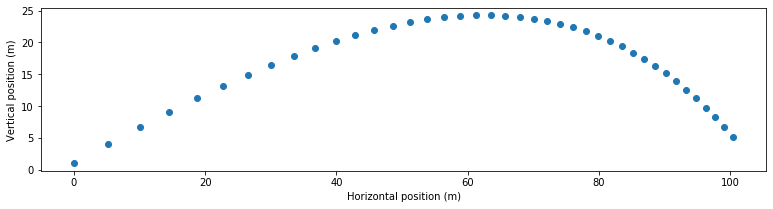

In [6]:
plt.figure(figsize=(13, 3))

plt.scatter(x_positions, y_positions)

plt.xlabel("Horizontal position (m)")
plt.ylabel("Vertical position (m)")

plt.show()

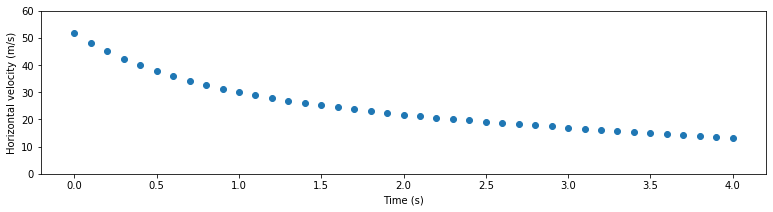

In [7]:
plt.figure(figsize=(13, 3))

plt.scatter(times, x_velocities)

plt.xlabel("Time (s)")
plt.ylabel("Horizontal velocity (m/s)")
plt.ylim(0, 60)

plt.show()

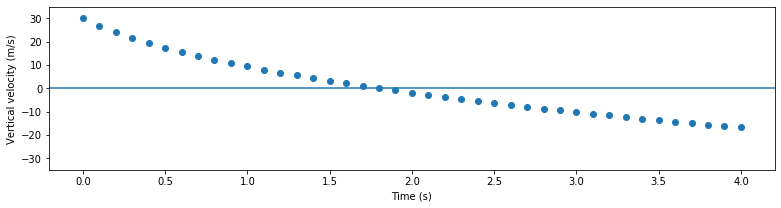

In [8]:
plt.figure(figsize=(13, 3))

plt.scatter(times, y_velocities)

plt.xlabel("Time (s)")
plt.ylabel("Vertical velocity (m/s)")
plt.ylim(-35, 35)
plt.axhline()

plt.show()

## Learning about Dependencies and Backtraces

Backtraces are also known as Tracebacks and also known as Stack Traces.

Dependencies:

* The big while loop depends on `acceleration_with_drag`
* `acceleration_with_drag` depends on several other functions including `angle_from_velocity`

It's like nested Russian dolls although it's only three dolls so far.

Let's intentionally break the code and see what happens. **Make the following two changes:**

* Change `angle_in_degrees = angle * 180.0 / pi` to have this mistake `angle_in_degrees = angle * [180.0 / pi]`
* Comment out the test `# acceleration_with_drag(32.16, 21.85)` that would catch the mistake

**After making the two changes, hit the Kernel->Restart &amp; Run All menu item.**

### Results

You should get the following garbage:

```
TypeError                                 Traceback (most recent call last)
<ipython-input-5-46dd0eecf3ea> in <module>
     26     # use the new acceleration_with_drag function to get the accelerations
     27     #
---> 28     x_acceleration, y_acceleration = acceleration_with_drag(before_x_velocity, before_y_velocity)
     29     #
     30     # bog-standard Euler update code -- in two dimensions

<ipython-input-4-afa6f8ab9be6> in acceleration_with_drag(horizontal_velocity, vertical_velocity)
      3 
      4 def acceleration_with_drag(horizontal_velocity, vertical_velocity):
----> 5     angle = angle_from_velocity(horizontal_velocity, vertical_velocity)
      6     speed = speed_from_velocity(horizontal_velocity, vertical_velocity)
      7     #

<ipython-input-3-010349adedeb> in angle_from_velocity(horizontal_velocity, vertical_velocity)
      6     angle = atan2(vertical_velocity, horizontal_velocity)
      7     # we are working in degrees -- convert radians to degrees
----> 8     angle_in_degrees = angle * [180.0 / pi]
      9     # return the result
     10     return angle_in_degrees

TypeError: can't multiply sequence by non-int of type 'float'
```

### Understanding the Results

The results have lots of extra lines to help you see where in the code the problem is at. Let's strip the extra lines out:

```
<ipython-input-5-46dd0eecf3ea> in <module>
---> 28     x_acceleration, y_acceleration = acceleration_with_drag(before_x_velocity, before_y_velocity)
<ipython-input-4-afa6f8ab9be6> in acceleration_with_drag(horizontal_velocity, vertical_velocity)
----> 5     angle = angle_from_velocity(horizontal_velocity, vertical_velocity)
<ipython-input-3-010349adedeb> in angle_from_velocity(horizontal_velocity, vertical_velocity)
----> 8     angle_in_degrees = angle * [180.0 / pi]
TypeError: can't multiply sequence by non-int of type 'float'
```

You can see the dependencies in this!

The code that was executing at the top level is called `<module>`. In C this would be `main`.

You are at line 28 of that code. In line 28, you can see that `acceleration_with_drag` is called.

The next line shows that you are in `acceleration_with_drag`.

You are at line 5 of that function. At line 5, you can see that `angle_from_velocity` is called.

The next line shows that you are in `angle_from_velocity`.

You are at line 8 of that function. That's exactly where we introduced the error!

The final line is trying to tell you what is wrong. It says you can't multiply a sequence by a float. Tuples, ranges, and lists are all called sequences.

The square brackets have turned `180.0 / pi` into a list. It would be fine to multiply `180.0 / pi` by `angle`, but it is not fine to multiply the list of one item `[180.0 / pi]` by `angle`.

## Conclusion

### Dependencies

We've started to write more complicated functions. For example some of our functions return tuples.

We've started to nest the functionality (functions calling other functions), creating what is called dependencies. In the above example:

* The big while loop depends on `acceleration_with_drag`
* `acceleration_with_drag` depends on several other functions including `angle_from_velocity`

### Backtraces

Errors can show up deep in the nesting. In the above example:

* the big while loop is a module and in it, we called `acceleration_with_drag`
* `acceleration_with_drag` called `angle_from_velocity` and that was where the error is

Hopefully you now see how backtraces directly reflect dependencies.

### Debugging

Every time the interpreter coughs up a backtrace it is trying to help you understand your code and its problems. It is exceedingly valuable to start reading them.

I have often studied backtraces that are 20 to 30 levels deep, but that isn't special. In fact, I have sometimes studied backtraces that are 60 to 80 levels deep. Software developers do this all the time. Start with backtraces that are just a few deep and soon you'll be reading very deep ones. After some time you will learn what to ignore and how to home in on the actual error.

Great programmers study backtraces and work with debuggers. Lousy programmers stick print statements into their code. Don't go that route. All modern computer languages have powerful debuggers. Soon I'll show you how to use the Python debugger instead of print statements when you want more diagnostics.